# Plot the output of count_events.py

In [1]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import oskar, positronium
import f2mods as f2

### Import data

In [9]:
rid = '20160323_203518'
h5 = oskar.H5Data(rid)             # data
out_dire = h5.out_dire("Count")     # output
# log 
h5.load_log()
logDF = h5.log
varDF = h5.vDF()
uDF = h5.uDF()
# count data
NAMES = ['CH_A0', 'CH_A1']
allDF = h5.load_count(NAMES, include_vars=True)
uDF.tail()

,DLY_EA,IR,UV,VOL_u100,VOL_u101
VID,,,,,
164,5.950000e-07,755.89,243.2,3500,2000
165,5.950000e-07,755.92,243.2,3500,2000
166,5.950000e-07,755.95,243.2,3500,2000
167,5.950000e-07,755.98,243.2,3500,2000
168,5.950000e-07,756.01,243.2,3500,2000


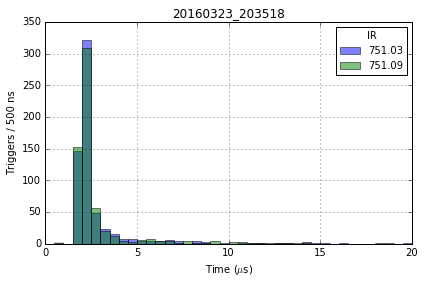

In [7]:
#plot setup
fig, ax = plt.subplots()
bin_width = 0.5
bins=np.arange(0.5,20 + bin_width, bin_width)

max_amp = 0.025
max_width = 0.5e-6
min_t = 3e-6
# select data
VIDS = [2, 4]
for vid in VIDS:
    # select data
    data = allDF[((allDF[uDF.columns] == uDF.loc[vid]).all(1))]
    # cut triggers
    data = data[(data['amp'] < max_amp) & (data['width'] < max_width)]
    trigs = (data['trigger'].values)*1e6
    ax.hist(trigs, bins=bins, alpha=0.5, label='%.2f'%uDF.loc[vid, 'IR'])
    
#format
plt.axhline(0, color='k', alpha=0.5)
lgd = ax.legend(loc=0, fontsize=10, title='IR')
ax.set_ylabel("Triggers / 500 ns");
ax.set_xlabel(r"Time ($\mu$s)");
#ax.set_ylim(0,2000)
plt.title(rid);
ax.grid(True)

#save data
plt.tight_layout();
fileout = os.path.join(out_dire, "_".join(NAMES) + '_triggers.png')
#plt.savefig(fileout, dpi=150)
plt.show()

In [10]:
hits = []
for vid in uDF.index:
    data = allDF[((allDF[uDF.columns] == uDF.loc[vid]).all(1))]
    acq_on = logDF.loc[np.unique(data.squid.values), 'ACQUIRE'].sum()
    # cut triggers
    #data = data[(data['amp'] < max_amp) & (data['width'] < max_width) & (data['trigger'] > min_t)]
    data = data[(data['trigger'] > min_t)]
    trigs = (data['trigger'].values)*1e6
    ntrigs = len(trigs)
    hit_rate = ntrigs/ acq_on
    hits.append(hit_rate)

In [13]:
fileout = os.path.join(out_dire, "vid_HR.tsv")
np.savetxt(fileout, hits)

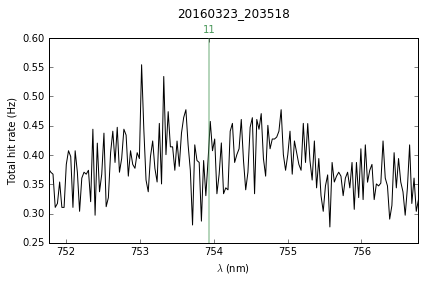

In [11]:
X = 'IR'
#plot setup
fig, ax = plt.subplots()

#plot
x = f2.rad_cal(uDF[X])
y = hits
ax.plot(x, y, 'k')
ax.set_xlim(x.min(), x.max())
ax, ax_top, ticks = f2.ryd_ticks(ax, color = oskar.colors[1], unit='nm',
                          labels=[10, 11, 12, 13, 14, 15, 
                                  16, 17, 19, 21, 23,
                                  100])
ax_top.grid(ls='-', which = 'both', alpha=0.4, color=oskar.colors[1], lw=2)
ax_top.set_xlim(ax.get_xlim())
#labels
ax.set_ylabel("Total hit rate (Hz)")
ax.set_xlabel("$\lambda$ (nm)")
plt.title(rid, y=1.08)


#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "long_n_HR.png")
plt.savefig(fileout, dpi=300, bbox_inches='tight')
plt.show()